# Face Recognition using EigenFaces

Pada projek kali ini, kita akan mempraktekan bagaimana membuat sistem face recognition menggunakan eigenfaces.

Face recognition menggunakan menggunakan eigenfaces pada dasarnya adalah menerapkan metode PCA untuk mereduksi dimensi. PCA adalah suatu metode untuk mereduksi dimensi dengan cara mentrasnformasikan data secara linear sehingga terbentuk sistem koordinat baru pada higher dimensional space.


In [10]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

## Read Images

In [11]:

dataset_path = 'Dataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

Train Images:


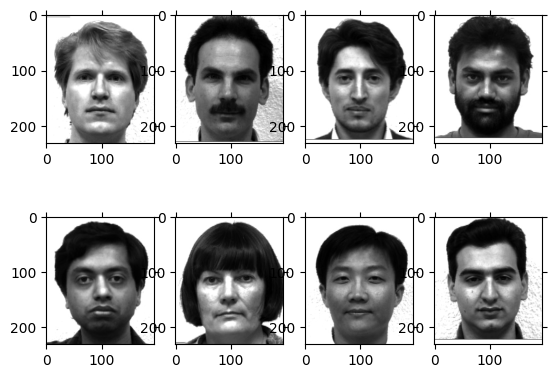

Test Images:


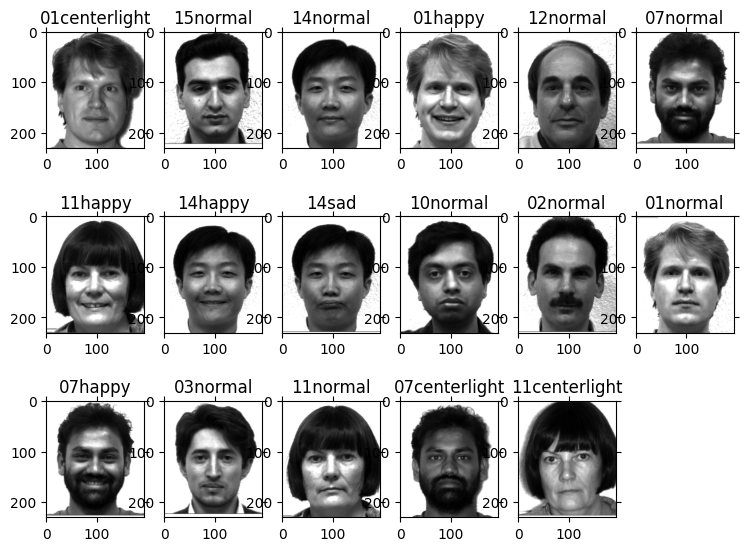

In [12]:
print('Train Images:')
train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg']
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

print('Test Images:')
test_image_names = dataset_dir#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = imread(dataset_path + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,6,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# Principal Component Analysist

## Search Mean Face

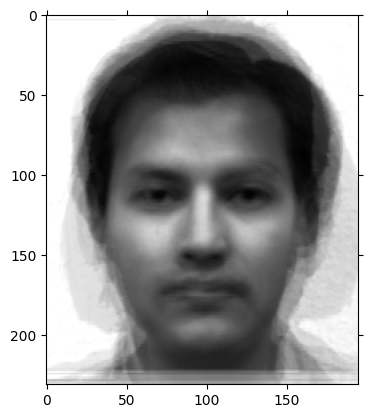

In [23]:
mean_face = np.zeros((1, height * width))

for img in training_tensor:
    mean_face = np.add(mean_face, img)

# Calculate mean face
mean_face = np.divide(mean_face, float(len(training_tensor))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Normalize Face

In [24]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

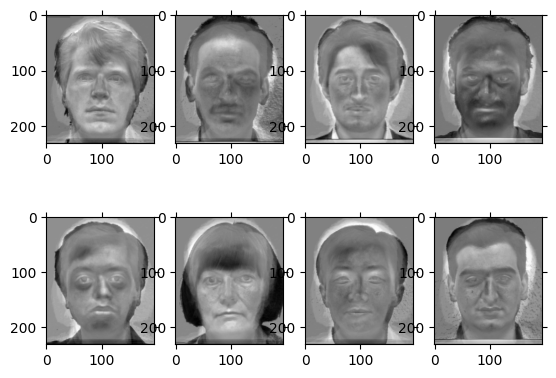

In [25]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Covariance Matrix

In [26]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 240.21425354  -54.37445049  -49.91300972 -167.04449305    6.71011608
    95.13549119   51.86167951 -122.58958706]
 [ -54.37445049  271.21637481  -39.69264581   66.46457924  -62.78262301
  -159.33970561  -96.7188796    75.22735047]
 [ -49.91300972  -39.69264581  223.857185     46.24225037  -32.6657127
  -134.1771553   -35.12864547   21.47773363]
 [-167.04449305   66.46457924   46.24225037  345.77440281  -80.00529939
  -267.06328206  -73.29909108  128.93093316]
 [   6.71011608  -62.78262301  -32.6657127   -80.00529939  256.35235515
   -63.58037876   53.02911913  -77.05757652]
 [  95.13549119 -159.33970561 -134.1771553  -267.06328206  -63.58037876
   747.14220277    1.26270451 -219.37987674]
 [  51.86167951  -96.7188796   -35.12864547  -73.29909108   53.02911913
     1.26270451  238.6557604  -139.66264741]
 [-122.58958706   75.22735047   21.47773363  128.93093316  -77.05757652
  -219.37987674 -139.66264741  333.05367046]]


In [27]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.24216786 -0.23304127  0.35355339 -0.54650028  0.34900164  0.24263134
  -0.46008264 -0.26652539]
 [-0.2320557   0.21004915  0.35355339  0.28336041  0.66156373 -0.40750816
   0.14797794 -0.26666354]
 [-0.15104702 -0.0756895   0.35355339  0.19555006 -0.49779746 -0.46987952
  -0.57605919 -0.08822017]
 [-0.41563654  0.18098142  0.35355339 -0.49133856 -0.36828479  0.0496277
   0.45683638 -0.28510056]
 [ 0.05114387 -0.48868195  0.35355339 -0.17720876  0.0789403  -0.29622126
   0.28068609  0.65529232]
 [ 0.73015769  0.53226997  0.35355339  0.03110374 -0.15710617 -0.06932017
   0.14579398  0.08274941]
 [ 0.14350419 -0.47101419  0.35355339  0.52641965 -0.14266291  0.41459652
   0.25325285 -0.31472933]
 [-0.36823436  0.34512637  0.35355339  0.17861375  0.07634566  0.53607356
  -0.2484054   0.48319727]]

Eigenvalues of Cov(X): 
[1.11554951e+03 4.85892625e+02 6.38493880e-14 1.22955135e+02
 2.95284929e+02 1.76427142e+02 2.32097712e+02 2.28059153e+02]


In [28]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

## Find Cumulative Variance for Each Principle Component

Cumulative proportion of variance explained vector: 
[0.41996902 0.60289218 0.7140576  0.80143503 0.88729207 0.95371129
 1.         1.        ]


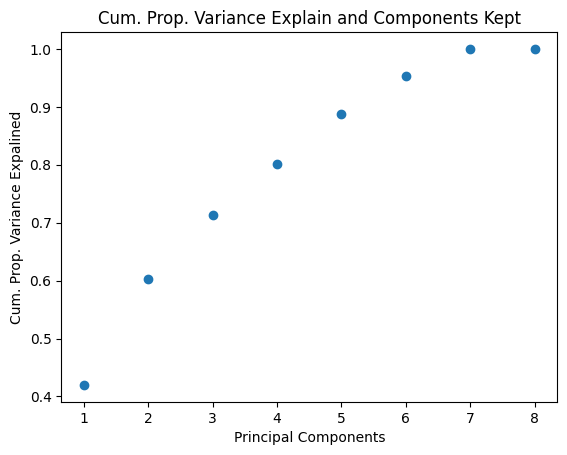

In [29]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

## Choose the Necessary No of PCA

In [30]:
reduced_data = np.array(eigvectors_sort[:7]).transpose()
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

## Plot Eigen Faces

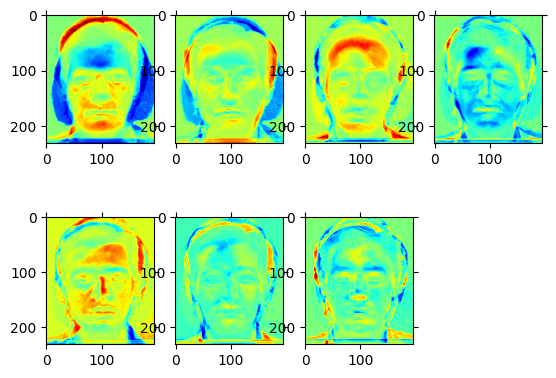

In [31]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Finding Weights for Each Training Images

In [32]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[ 8.48287612e+07, -5.81765456e+07,  4.32101930e+07,
        -7.76647463e+07, -3.06341089e+07,  3.58272786e+07,
        -3.53176153e+07],
       [-8.90553605e+07,  4.26457404e+07,  6.83431225e+07,
         2.56112699e+07, -1.89660204e+07, -3.27984752e+07,
         1.63052275e+07],
       [-6.49888673e+07, -1.91766896e+07, -5.08976401e+07,
        -6.15416348e+07, -1.02271740e+07, -2.29160969e+07,
         4.87793668e+06],
       [-1.63772788e+08,  3.62801041e+07, -4.07933003e+07,
         4.85649446e+07, -2.11225024e+07, -2.23707416e+06,
        -1.88350738e+07],
       [ 2.50823074e+07, -7.92886248e+07,  6.20549912e+06,
         3.76311039e+07,  5.70068630e+07, -2.62025963e+07,
        -3.84041861e+06],
       [ 3.03507468e+08,  1.07059520e+08, -2.15641534e+07,
         4.34624113e+07,  1.37673278e+07, -2.06872576e+07,
         1.02386688e+07],
       [ 5.73401449e+07, -8.29527225e+07, -1.50118335e+07,
         2.00947251e+07, -2.61070419e+07,  2.69240539e+07,
         2.3016248

## Recognize new Face

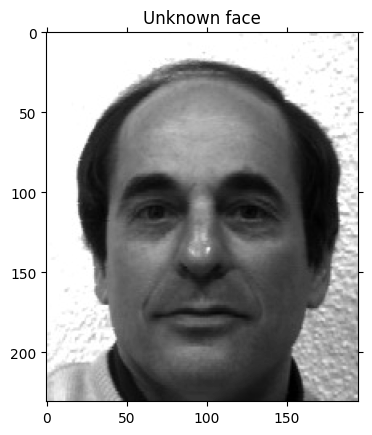

In [33]:
unknown_face        = plt.imread('Dataset/subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

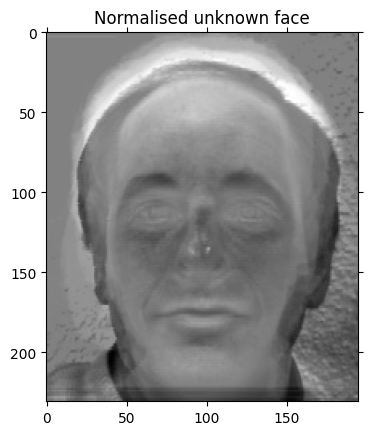

In [34]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [35]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([-4.70038929e+07, -1.65543498e+08,  2.16510446e+07, -1.60182424e+08,
       -3.66812704e+07,  9.24751216e+07, -3.78133854e+07])

In [36]:
# Search difference between w known and w unknown
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
min(norms)

[1.98578071e+08 3.17406144e+08 2.29297886e+08 3.33789084e+08
 2.75719259e+08 5.08103510e+08 2.44257922e+08 2.90397405e+08]


198578071.0007423

## Recognize All Images

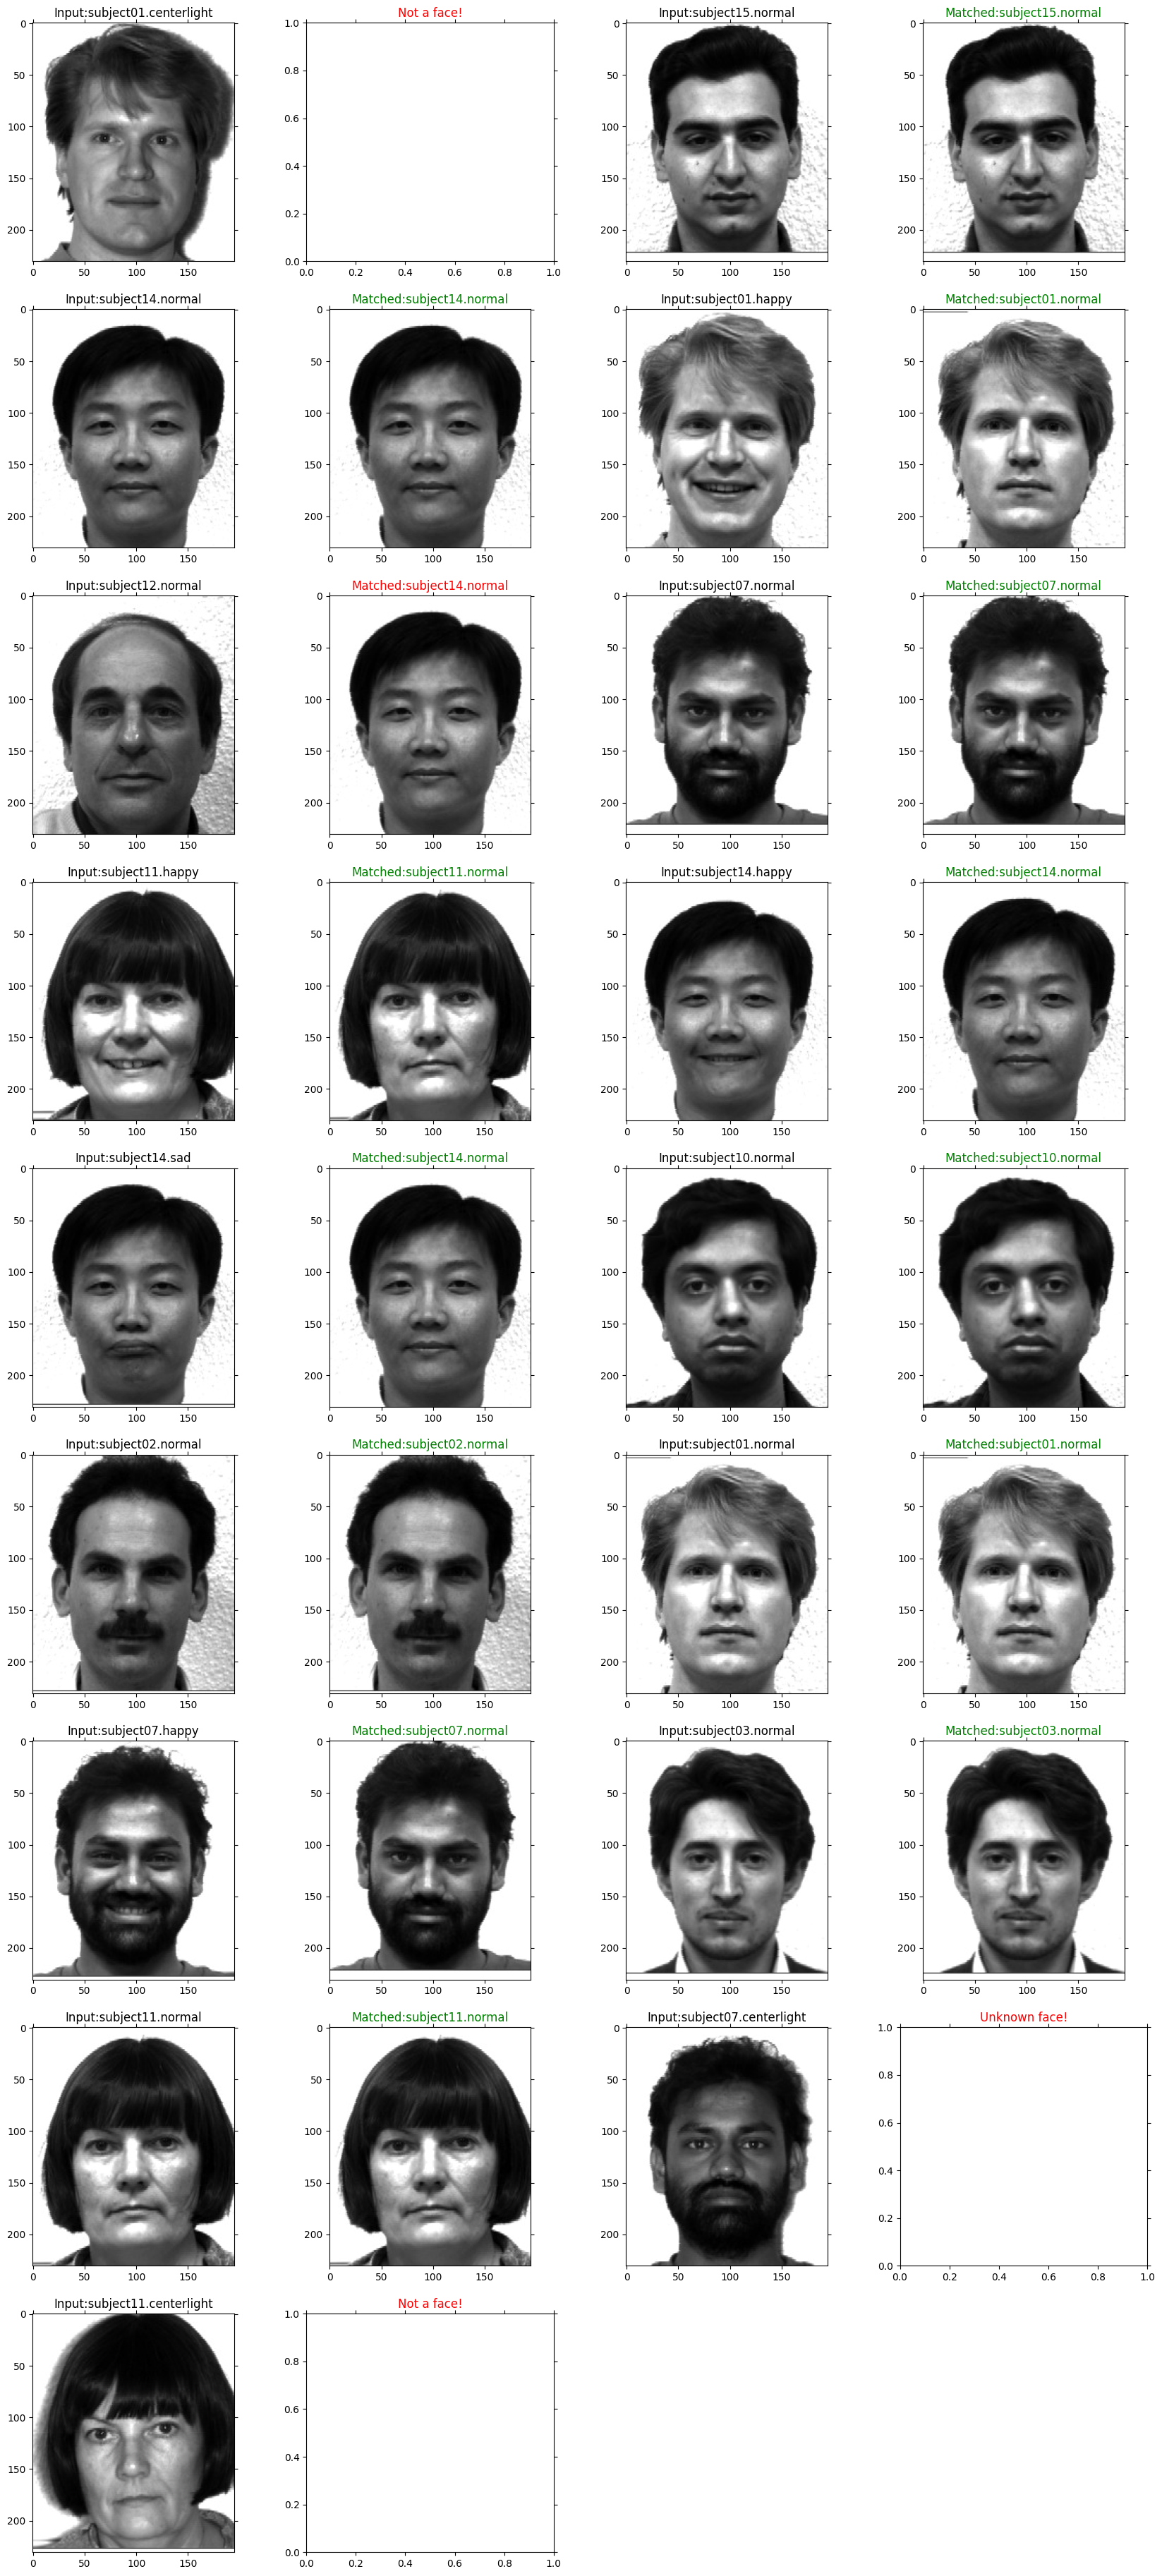

Correct predictions: 13/17 = 76.47058823529412%


In [37]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread('Dataset/'+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    #t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    t0 = 88831687
    #t0 = 143559033 # working with 6 faces
    
    if norms[index] < t1:
        plt.subplot(9,4,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))